<img src="ublogo.png"/>

# CSE474/574 - Introduction to Machine Learning

  - Python Demonstrations
  - Instructor - Varun Chandola


In [1]:
import numpy as np
from scipy.io import loadmat
import random
import math


from sklearn.linear_model import LogisticRegression
from sklearn import linear_model as lm

from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles, load_boston, load_iris, load_digits

import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning) 


/Users/chandola/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
sns.set(color_codes=True)
sns.set_style('whitegrid')
sns.set_context('paper',font_scale=2)
from mpl_toolkits import mplot3d
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
%matplotlib inline

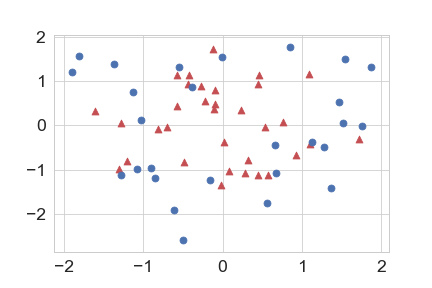

In [42]:
h = .02  # step size in the mesh


ds = make_circles(noise=0.3, factor=0.6, random_state=1)

# preprocess dataset, split into training and test part
X, y = ds
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the training points
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='r',marker='^',s=48)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='b',marker='o',s=48)


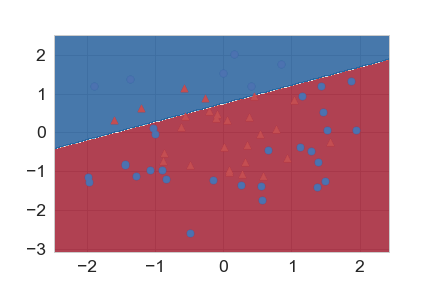

In [6]:
h = .02  # step size in the mesh


ds = make_circles(noise=0.3, factor=0.6, random_state=1)

# preprocess dataset, split into training and test part
X, y = ds
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the training points
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='r',marker='^',s=48)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='b',marker='o',s=48)


clf = LogisticRegression(C=1e5)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='r',marker='^',s=48)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='b',marker='o',s=48)    

plt.show()

## Non-linear logistic regression via polynomial expansion

In [11]:
# non-linear (polynomial) expansion
p = 5
pf = PolynomialFeatures(degree=p,include_bias=False)

pf = pf.fit(X_train)
X_train_p = pf.transform(X_train)

X_test = np.c_[xx.ravel(), yy.ravel()]
pf = pf.fit(X_test)
X_test_p = pf.transform(X_test)

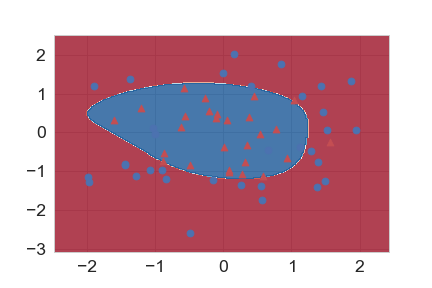

In [12]:
clf = LogisticRegression()
clf.fit(X_train_p, y_train)
mZ = clf.predict(X_test_p)
mZ = mZ.reshape(xx.shape)
plt.contourf(xx, yy, mZ, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='r',marker='^',s=48)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='b',marker='o',s=48)    

plt.show()

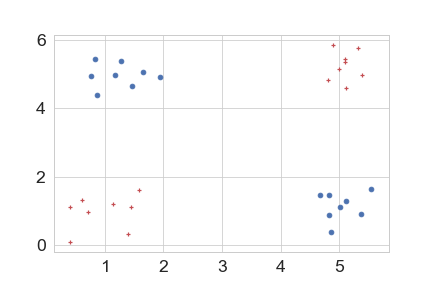

In [13]:
sigma = np.array([[0.2,0],[0,0.2]])
n = 8
mu1 = np.array([1,1])
mu2 = np.array([1,5])
mu3 = np.array([5,1])
mu4 = np.array([5,5])
x11 = np.random.multivariate_normal(mu1,sigma,n)
x15 = np.random.multivariate_normal(mu2,sigma,n)
x51 = np.random.multivariate_normal(mu3,sigma,n)
x55 = np.random.multivariate_normal(mu4,sigma,n)

X = np.vstack([x11,x15,x51,x55])
y = np.ones([4*n,1])
y[n:3*n] = 2
plt.scatter(X[np.where(y == 1)[0],0],X[np.where(y == 1)[0],1],c='r',marker='+')
plt.scatter(X[np.where(y == 2)[0],0],X[np.where(y == 2)[0],1],c='b',marker='o')


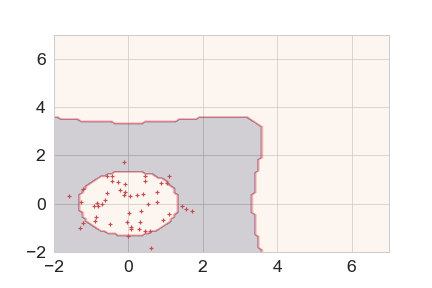

In [43]:
# Use logistic regression with basis function expansion
p = 6
mX = np.zeros((X.shape[0],p))
for i in range(p):
    mX[:,i] = np.sum(X**(i+1),axis=1)

# Learn logistic regression
lr = lm.LogisticRegression()
w = lr.fit(mX,y.ravel())

# evaluate on a grid
x1 = np.linspace(-2,7,100)
x2 = np.linspace(-2,7,100)
xx1,xx2 = np.meshgrid(x1,x2)
Xstar = np.zeros((x1.shape[0]*x2.shape[0],2))
Xstar[:,0] = xx1.ravel()
Xstar[:,1] = xx2.ravel()
mXstar = np.zeros((Xstar.shape[0],p))
for i in range(p):
    mXstar[:,i] = np.sum(Xstar**(i+1),axis=1)
ystar = lr.predict(mXstar)

# visualize the result
plt.contourf(x1,x2,ystar.reshape((x1.shape[0],x2.shape[0])),alpha=0.2)
plt.scatter(X[np.where(y == 1)[0],0],X[np.where(y == 1)[0],1],c='r',marker='+')
plt.scatter(X[np.where(y == 2)[0],0],X[np.where(y == 2)[0],1],c='b',marker='o')

## Dealing with radial data

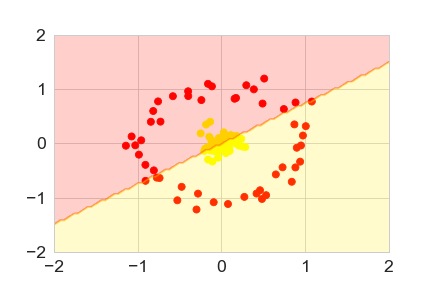

In [38]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
lr = lm.LogisticRegression()
w = lr.fit(X,y.ravel())

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# evaluate on a grid
x1 = np.linspace(-2,2,100)
x2 = np.linspace(-2,2,100)
xx1,xx2 = np.meshgrid(x1,x2)
Xstar = np.zeros((x1.shape[0]*x2.shape[0],2))
Xstar[:,0] = xx1.ravel()
Xstar[:,1] = xx2.ravel()
ystar = lr.predict(Xstar)

# visualize the result
plt.contourf(x1,x2,ystar.reshape((x1.shape[0],x2.shape[0])),cmap='autumn',alpha=0.2)


In [39]:
r = np.exp(-(X ** 2).sum(1))

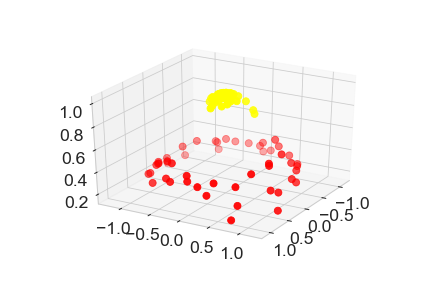

In [40]:
ax = plt.subplot(projection='3d')
ax.view_init(elev=30, azim=30)
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')

In [ ]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y,r=r):
    ax = plt.subplot(projection='3d')
    ax.view_init(elev=30, azim=30)
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
plot_3D(X=X,y=y,r=r)
